# Take Home Exam

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats as sms
import statsmodels.stats.diagnostic as smd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from scipy.optimize import minimize
import statsmodels.api as sm
import statsmodels.tsa.stattools as st
import statsmodels.tsa.stattools as sts
from arch import unitroot
from statsmodels.tsa.arima.model import ARIMA

## 1.  In this problem you explore the properties of different time series and evaluate some time series models.

# a) 
The file NGDPRSAXDCGBQ.csv contains data on seasonally adjusted real UK GDP
for a period from 1983Q1 - 2023Q3.1   
Compute and plot the logarithm, the annualized quarter-over-quarter growth rates, and the year-over-year (annual) growth rates of the series in %.   
Describe (using words) the main features of the time series.

In [298]:
# loading data
df = pd.read_csv("./NGDPRSAXDCGBQ.csv")

In [299]:
year = df["DATE"].str.slice(0, 4)

In [300]:
# compute the logarithm 
gdp = np.array(df["NGDPRSAXDCGBQ"])
log_gdp = np.log(gdp)

Text(0.5, 1.0, 'Logarithm of the real UK GDP (graph1)')

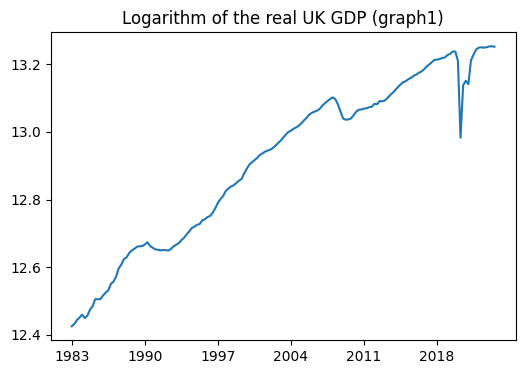

In [301]:
# create the plot of the logarithm of GDP
plt.figure(figsize=(6, 4))
plt.xticks(range(0, len(df), 28), year[list(range(0, len(df), 28))])
plt.plot(log_gdp)
plt.title("Logarithm of the real UK GDP (graph1)")

Text(0.5, 1.0, 'Annuallized quarter-over-quarter growth rates\n of the real UK GDP (graph2)')

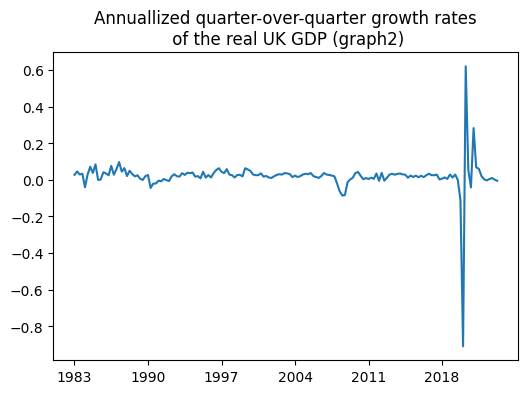

In [302]:
# create the plot of the annualized quarter-over-quarter growth rates of the series in %
gdp_growth_quarterly = np.log(gdp[1:]) - np.log(gdp[:-1])
annualized_growth_quarter = gdp_growth_quarterly*4 
plt.figure(figsize=(6, 4))
plt.xticks(range(0, len(df), 28), year[list(range(0, len(df), 28))])
plt.plot(annualized_growth_quarter)
plt.title("Annuallized quarter-over-quarter growth rates\n of the real UK GDP (graph2)")

Text(0.5, 1.0, 'Year-over-year growth rates of the real UK GDP (graph3)')

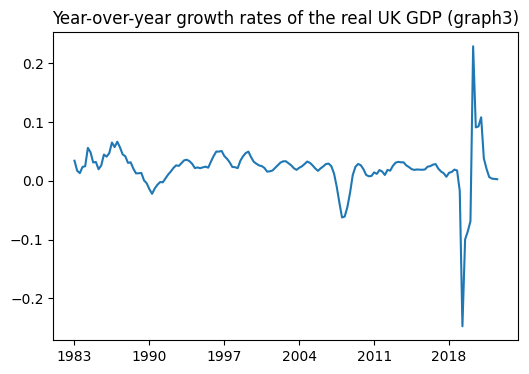

In [303]:
# create the plot of the year-over-year growth rates of the real UK GDP
gdp_growth_yearly = np.log(gdp[4:]) - np.log(gdp[:-4])
plt.figure(figsize=(6, 4))
plt.xticks(range(0, len(df), 28), year[list(range(0, len(df), 28))])
plt.plot(gdp_growth_yearly)
plt.title("Year-over-year growth rates of the real UK GDP (graph3)")

Use the data from 1983Q1 to 2019Q4 for the following problems.

In [304]:
df_2 = df[:-15]
df_2

,DATE,NGDPRSAXDCGBQ
0,1983-01-01,249032.0
1,1983-04-01,250761.0
2,1983-07-01,253655.0
3,1983-10-01,255533.0
4,1984-01-01,257683.0
...,...,...
143,2018-10-01,551128.0
144,2019-01-01,555141.0
145,2019-04-01,556932.0
146,2019-07-01,560987.0


# b)
Let y<sub>t</sub> denote the annualized quarter-over-quarter growth rate of real GDP. Plot SACFs and SPACFs for yt together with ±2/√T bounds. </br> 
Based on your graphs, suggest a pure MA model. Explain your choice briefly

In [305]:
gdp = np.array(df_2["NGDPRSAXDCGBQ"])
gdp_growth_quarterly = np.log(gdp[1:]) - np.log(gdp[:-1])
y = gdp_growth_quarterly*4 

<Figure size 600x400 with 0 Axes>

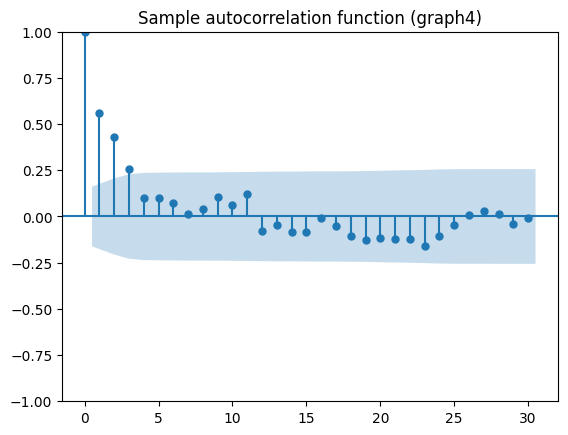

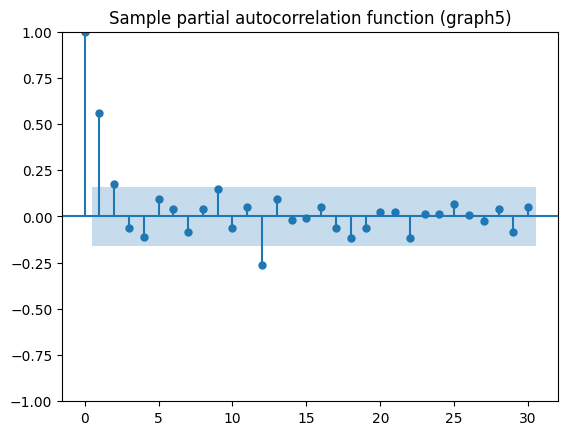

In [306]:
plt.figure(figsize=(6, 4))
plot_acf(y, lags=30, title="Sample autocorrelation function (graph4)")
plot_pacf(y, lags=30, title="Sample partial autocorrelation function (graph5)")
plt.show()

# c)
Apply information criteria to select a pure AR model for yt (use models with an intercept,
pmax = 8). What are the suggested lag orders?

In [307]:
arma_results = sts.arma_order_select_ic(y, max_ar=8, max_ma=0, ic=["aic", "hqic", "bic"], trend='c')

c:\Users\Nutzer\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [308]:
arma_results["aic"]

,0
0,-664.959104
1,-718.081821
2,-720.540362
3,-719.104524
4,-718.980181
5,-718.313981
6,-716.546047
7,-715.548349
8,-713.777688


In [309]:
arma_results["hqic"]

,0
0,-662.529013
1,-714.436685
2,-715.680181
3,-713.029298
4,-711.689909
5,-709.808664
6,-706.825685
7,-704.612943
8,-701.627236


In [310]:
arma_results["bic"]

,0
0,-658.978239
1,-709.110523
2,-708.578631
3,-704.152361
4,-701.037585
5,-697.380952
6,-692.622586
7,-688.634456
8,-683.873362


The suggested lag order by AIC is lag 2  
The suggested lag order by HQIC is lag 2  
The suggested lag order by BIC is lag 1

# d)
Estimate an AR(2) with intercept for yt using the LS method. Report the parameter
estimates together with asymptotic standard errors.

In [311]:
# setting y again 
log_data = np.log(df_2["NGDPRSAXDCGBQ"])
y = log_data.diff(1) * 4


# setting the explanatory variables
y_lag_1 = y.shift(1)
y_lag_2 = y.shift(2)

# adjusting the y_log_1 and y_log_2
y_lag_1 = y_lag_1.dropna().iloc[1:]
y_lag_2 = y_lag_2.dropna()

X = np.column_stack((y_lag_1, y_lag_2)) 
X = sm.add_constant(X)

# adjusting the y value
y_ad = y.dropna().iloc[2:]

# OLS model
model = sm.OLS(y_ad, X)
results = model.fit()

# showing the summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:          NGDPRSAXDCGBQ   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     35.88
Date:                Mon, 24 Jun 2024   Prob (F-statistic):           2.44e-13
Time:                        08:41:57   Log-Likelihood:                 359.07
No. Observations:                 145   AIC:                            -712.1
Df Residuals:                     142   BIC:                            -703.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0077      0.002      3.197      0.0

In [312]:
print("parameters are:")
results.params

parameters are:


const    0.007739
x1       0.462613
x2       0.174506
dtype: float64

In [313]:
print("asymptotic standard errors are:")
results.bse

asymptotic standard errors are:


const    0.002421
x1       0.082828
x2       0.082836
dtype: float64

# e)
For the estimated AR(2) in d) give plots of standardized residuals and residual ACFs
and PACFs. 

Text(0.5, 1.0, 'Standardized residuals (graph6)')

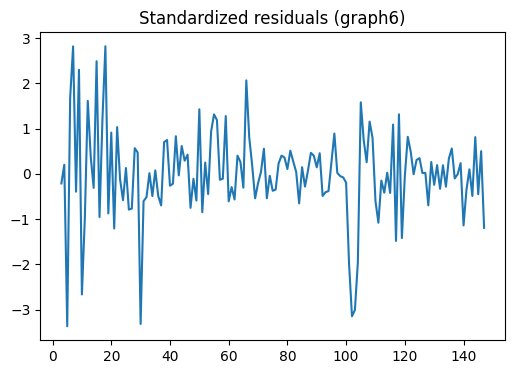

In [314]:
# a plot of standardized residuals
residuals = results.resid
standardized_residuals = results.resid / results.resid.std()

plt.figure(figsize=(6, 4))
plt.plot(standardized_residuals)
plt.title("Standardized residuals (graph6)")


<Figure size 600x400 with 0 Axes>

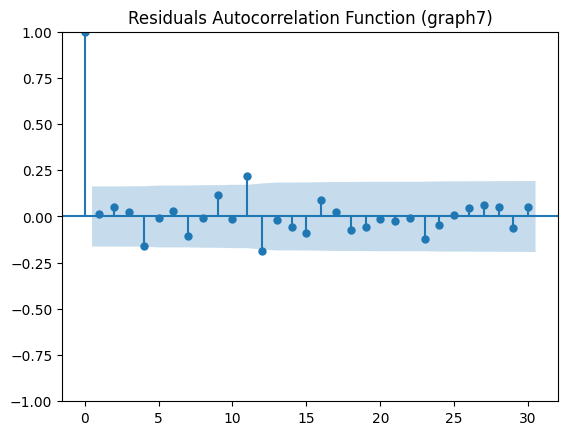

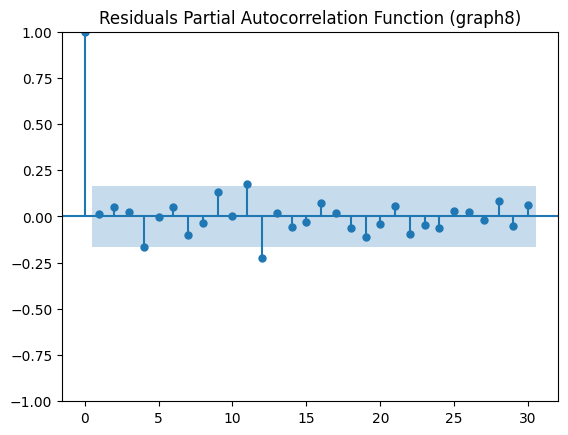

In [315]:
# a plot of residuals ACFs, PACFs
plt.figure(figsize=(6, 4))
plot_acf(residuals, lags=30, alpha=0.05, title='Residuals Autocorrelation Function (graph7)')
plot_pacf(residuals, lags=30, alpha=0.05, title='Residuals Partial Autocorrelation Function (graph8)')
plt.show()

Conduct diagnostic tests for remaining residual autocorrelation (use modified Portmanteau tests, LM and LMF tests).  
Also perform a non-normality test for the estimated model. Describe your results and comment on the adequacy of the model.

In [316]:
# portmanteau test
portmanteau_test = smd.acorr_ljungbox(standardized_residuals, lags=20, model_df=2, return_df=True)
portmanteau_test

,lb_stat,lb_pvalue
1,0.022412,NaN
2,0.433621,NaN
3,0.536285,0.463976
4,4.379414,0.111950
5,4.385201,0.222762
6,4.544627,0.337289
7,6.327009,0.275687
8,6.336595,0.386559
9,8.368572,0.301218
10,8.405694,0.394876


We can reject the null at 5% significant level if the lag is larger than 11 

In [317]:
# lm and lmf tests, (breusch-godfrey)
lm_stats, lm_pval, f_stats, f_pval = smd.acorr_breusch_godfrey(results, nlags=16)
print(f"\nBreusch-Godfrey Test Results:")
print(f"LM Statistic: {lm_stats:.4f}")
print(f"LM p-value: {lm_pval:.4f}")
print(f"F Statistic: {f_stats:.4f}")
print(f"F p-value: {f_pval:.4f}")


Breusch-Godfrey Test Results:
LM Statistic: 22.0443
LM p-value: 0.1418
F Statistic: 1.4119
F p-value: 0.1463


We cannot reject the null of the LM test nor the LMF test.

In [318]:
# non-normality test
# Jarque-Bera test
import statsmodels.stats.stattools as st
jb_test_stat, jb_test_pvalue, _, _ = st.jarque_bera(standardized_residuals)
print(f"\nJarque-Bera Test Results:")
print(f"JB Statistic: {jb_test_stat:.4f}")
print(f"JB p-value: {jb_test_pvalue:.4f}")


Jarque-Bera Test Results:
JB Statistic: 43.9719
JB p-value: 0.0000


We can reject the null at 1% significance level.

# f)
Estimate the AR(2) model from d) using exact ML and report the MLE estimates of
c, α1, α2 and σ2 together with their asymptotic standard errors. Note: For this part you
have to program the ML estimator on your own. This involves setting up the exact
log-likelihood function and using an optimizer.2 What is the value of the maximized
log-likelihood function? Do you get the same parameter estimates as from Python’s
statsmodels ARIMA function? What is the estimated mean based on the AR(2)?

In [319]:
# setting the dataframe and calculating the y again
df = pd.read_csv("./NGDPRSAXDCGBQ.csv")
log_gdp = [np.log(i) for i in df["NGDPRSAXDCGBQ"]]
qq_growth_rates = [((1 + log_gdp[i] - log_gdp[i-1])**4 - 1) for i in range(0, len(df))]

y = qq_growth_rates[0:148]

In [320]:
# exact maximumlikehood 

def log_likelihood(params, y):
    """
    Calculate the negative log-likelihood for an AR(1) model with intercept.

    Parameters:
    params : array-like
        A list or array containing the parameters of the AR(1) model.
        - c: The intercept term.
        - alpha: The AR(1) coefficient.
        - sigma2: The variance of the white noise error term.
    y : array-like
        A 1-dimensional array of time series data.

    Returns: float
      The negative log-likelihood of the AR(1) model given the parameters and data.
    """
    c, alpha1, alpha2, sigma2 = params
    T = len(y)
    
    # collect first 2 observations of the time series
    y_vector = np.array([y[0], y[1]]).reshape(2, 1)
    
    # mu
    mu = c / (1 - alpha1 - alpha2)
    #mu_vector = np.full(2, mu)
    mu_vector = np.array([[mu], [mu]])

    
    # v
    alpha0 = -1
    v_vector = np.array([
        [alpha0**2 - alpha2**2],
        [(alpha0*alpha1) - (alpha1*alpha2)],
        [(alpha0*alpha1) - (alpha1*alpha2)],
        [(alpha0**2 + alpha1**2) - (alpha1**2 + alpha2**2)]
    ]).reshape(2, 2)
    
    v_vector_det = np.linalg.det(v_vector)
    
    
    # summation term
    sum_term = np.sum([(y[i] - c - alpha1 * y[i - 1] - alpha2 * y[i - 2])**2 / (2 * sigma2) for i in range(2, T)])
    
    log_like = (
        - T * 0.5 * np.log(2 * np.pi) 
        - T * 0.5 * np.log(sigma2)
        + 0.5 * np.log(v_vector_det)
        - (1 / (2 * sigma2)) * np.dot(np.dot(np.transpose(y_vector - mu_vector), v_vector), (y_vector - mu_vector))
        - sum_term
        )
    return -log_like

def ar2_mle(time_series):
    """
    Estimate the parameters of an AR(1) model with intercept using Maximum Likelihood Estimation (MLE).

    Parameters:
    y : array-like
        A 1-dimensional array of time series data.

    Returns:
    dict
        A dictionary containing the results of the MLE estimation:
        - 'Hessian Matrix': The inverse of the Hessian matrix at the optimal point.
        - 'c': The estimated intercept term.
        - 'alpha1': The estimated AR(1) coefficient.
        - 'alpha2': The estimated AR(2) coefficient.
        - 'sigma2': The estimated variance of the white noise error term.
        - 'std_errors': The standard errors of the estimated parameters.
        - 'max_log_likelihood': The maximum log-likelihood value at the optimal point.
    """
    
    # Initial parameter estimates
    c_start = 0
    alpha_start_1 = 0.5
    alpha_start_2 = 0.2
    sigma2_start = 0.0001
    start_params = np.array([c_start, alpha_start_1, alpha_start_2, sigma2_start])

    # setting bounds
    bounds = [(None, None), (-0.9999, 0.9999), (-0.9999, 0.9999), (1e-8, 20)]

    # Optimize the log-likelihood function
    opt_res = minimize(log_likelihood, start_params, args=(time_series,), bounds=bounds, method='L-BFGS-B', options={'gtol': 1e-8, 'eps': 1e-8})

    # getting asymptotic standard errors
    se = np.sqrt(np.diag(opt_res.hess_inv.todense()))
    
    # outputting the results as a dictionary
    return {
        'Hessian matrix': opt_res.hess_inv.todense(),
        'coefficients':{'c': opt_res.x[0], 
        'alpha1': opt_res.x[1],
        'alpha2': opt_res.x[2],
        'sigma2': opt_res.x[3]},
        'std_errors': {
            'c': se[0],
            'alpha1': se[1],
            'alpha2': se[2],
            'sigma2': se[3]
        },
        'max_log_likelihood': -opt_res.fun
    }



In [321]:
# run the function
ar2_mle(y[1:])

{'Hessian matrix': array([[ 1.43618078e+00, -3.61754047e+01, -2.75331537e+01,
          1.96904066e-02],
        [-3.61754047e+01,  9.11996132e+02,  6.93223223e+02,
         -4.95698947e-01],
        [-2.75331537e+01,  6.93223223e+02,  5.28508734e+02,
         -3.77276304e-01],
        [ 1.96904066e-02, -4.95698947e-01, -3.77276304e-01,
          2.70242197e-04]]),
 'coefficients': {'c': 0.008275022982464035,
  'alpha1': 0.46059682514988554,
  'alpha2': 0.1700016053151856,
  'sigma2': 0.0004204558496704455},
 'std_errors': {'c': 1.198407600676266,
  'alpha1': 30.19927370754045,
  'alpha2': 22.989317817023696,
  'sigma2': 0.01643904490632986},
 'max_log_likelihood': 362.6035008759334}

In [322]:

# checking the result by comparing the built in function ARIMA

model = ARIMA(y[1:], order=(2, 0, 0)).fit()
print(model.summary())



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  147
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 362.617
Date:                Mon, 24 Jun 2024   AIC                           -717.234
Time:                        08:41:57   BIC                           -705.272
Sample:                             0   HQIC                          -712.374
                                - 147                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0224      0.005      4.757      0.000       0.013       0.032
ar.L1          0.4507      0.054      8.310      0.000       0.344       0.557
ar.L2          0.1811      0.065      2.794      0.0

## Use data from 1983Q1 to 2023Q3 for the following problem.

In [323]:
# loading the data again
df = pd.read_csv("./NGDPRSAXDCGBQ.csv")
df

,DATE,NGDPRSAXDCGBQ
0,1983-01-01,249032.0
1,1983-04-01,250761.0
2,1983-07-01,253655.0
3,1983-10-01,255533.0
4,1984-01-01,257683.0
...,...,...
158,2022-07-01,567445.0
159,2022-10-01,568034.0
160,2023-01-01,569472.0
161,2023-04-01,569687.0


# g) 
Estimate the AR(2) model from d) over the sample period ending in 2023Q3. How
do the estimated autoregressive parameters change compared to those from d)? Also
provide a residual plot.

In [324]:
# setting y again 
log_data = np.log(df["NGDPRSAXDCGBQ"])
y = log_data.diff(1) * 4


# setting the explanatory variables
y_lag_1 = y.shift(1)
y_lag_2 = y.shift(2)

# adjusting the y_log_1 and y_log_2
y_lag_1 = y_lag_1.dropna().iloc[1:]
y_lag_2 = y_lag_2.dropna()

X = np.column_stack((y_lag_1, y_lag_2)) 
X = sm.add_constant(X)

# adjusting the y value
y_ad = y.dropna().iloc[2:]

# OLS model
model = sm.OLS(y_ad, X)
results = model.fit()

# showing the summary
print(results.summary())




                            OLS Regression Results                            
Dep. Variable:          NGDPRSAXDCGBQ   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     6.952
Date:                Mon, 24 Jun 2024   Prob (F-statistic):            0.00128
Time:                        08:41:57   Log-Likelihood:                 158.24
No. Observations:                 160   AIC:                            -310.5
Df Residuals:                     157   BIC:                            -301.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0288      0.008      3.766      0.0

In [325]:
print("parameters are:")
results.params

parameters are:


const    0.028755
x1      -0.290561
x2      -0.125667
dtype: float64

In [326]:
print("asymptotic standard errors are:")
results.bse

asymptotic standard errors are:


const    0.007635
x1       0.079182
x2       0.079190
dtype: float64

([<matplotlib.axis.XTick at 0x29959b5e8a0>,
 [Text(0, 0, '1983'),
  Text(28, 0, '1990'),
  Text(56, 0, '1997'),
  Text(84, 0, '2004'),
  Text(112, 0, '2011'),
  Text(140, 0, '2018')])

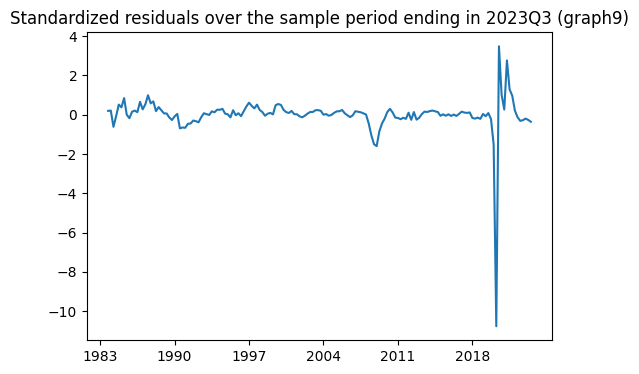

In [327]:
standardized_residuals_2 = results.resid / np.std(results.resid)

plt.figure(figsize=(6, 4))
plt.plot(standardized_residuals_2)
plt.title("Standardized residuals over the sample period ending in 2023Q3 (graph9)")
year = df["DATE"].str.slice(0, 4)
plt.xticks(range(0, len(df), 28), year[list(range(0, len(df), 28))])

 Your fellow researcher things that the results are driven by
unusually small and large growth rate observations in the extented sample. Therefore,
she suggests to create ‘impulse dummy variables’ for the quarters 2020Q1, 2020Q2,
2020Q3, 2021Q1, 2021Q2. Each impulse dummy takes on value 1 in the respective
quarter and is zero elsewhere. Reestimate the AR(2) with the impulse dummies and
report estimates and a standardized residual plot.

In [328]:

# setting the explanatory variables
y_lag_1 = y.shift(1)
y_lag_2 = y.shift(2)
# adjusting the y_log_1 and y_log_2
y_lag_1 = y_lag_1.dropna().iloc[1:]
y_lag_2 = y_lag_2.dropna()



# setting the impulse dummy variables for 

# 2020Q1
df["dummy_2020Q1"] = 0
df.loc[148, "dummy_2020Q1"] = 1

# 2020Q2
df["dummy_2020Q2"] = 0
df.loc[149, "dummy_2020Q2"] = 1

# 2020Q3
df["dummy_2020Q3"] = 0
df.loc[150, "dummy_2020Q3"] = 1

# 2021Q1
df["dummy_2021Q1"] = 0
df.loc[152, "dummy_2021Q1"] = 1

# 2021Q2
df["dummy_2021Q2"] = 0
df.loc[153, "dummy_2021Q2"] = 1

# adjusting the length of columns
dummy_2020Q1 = df["dummy_2020Q1"].dropna().iloc[3:]
dummy_2020Q2 = df["dummy_2020Q2"].dropna().iloc[3:]
dummy_2020Q3 = df["dummy_2020Q3"].dropna().iloc[3:]
dummy_2021Q1 = df["dummy_2021Q1"].dropna().iloc[3:]
dummy_2021Q2 = df["dummy_2021Q2"].dropna().iloc[3:]

#dummy_variables = df[["dummy_2020Q1", "dummy_2020Q2", "dummy_2020Q3", "dummy_2021Q1", "dummy_2021Q2"]]



X = np.column_stack((y_lag_1, y_lag_2, dummy_2020Q1, dummy_2020Q2, dummy_2020Q3, dummy_2021Q1, dummy_2021Q2)) 
X = sm.add_constant(X)

# adjusting the y value
y_ad = y.dropna().iloc[2:]

# OLS model
model = sm.OLS(y_ad, X)
results = model.fit()

# showing the summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:          NGDPRSAXDCGBQ   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     452.5
Date:                Mon, 24 Jun 2024   Prob (F-statistic):           2.35e-98
Time:                        08:41:57   Log-Likelihood:                 398.15
No. Observations:                 160   AIC:                            -780.3
Df Residuals:                     152   BIC:                            -755.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0090      0.002      4.055      0.0

In [329]:
print("parameters are:")
results.params

parameters are:


const    0.009001
x1       0.346809
x2       0.186094
x3      -0.124460
x4      -0.879289
x5       0.947018
x6      -0.184317
x7       0.278121
dtype: float64

In [330]:
print("asymptotic standard errors are:")
results.bse

asymptotic standard errors are:


const    0.002220
x1       0.039600
x2       0.028044
x3       0.020703
x4       0.021489
x5       0.044712
x6       0.027181
x7       0.020793
dtype: float64

([<matplotlib.axis.XTick at 0x2995b6cf9b0>,
 [Text(0, 0, '1983'),
  Text(28, 0, '1990'),
  Text(56, 0, '1997'),
  Text(84, 0, '2004'),
  Text(112, 0, '2011'),
  Text(140, 0, '2018')])

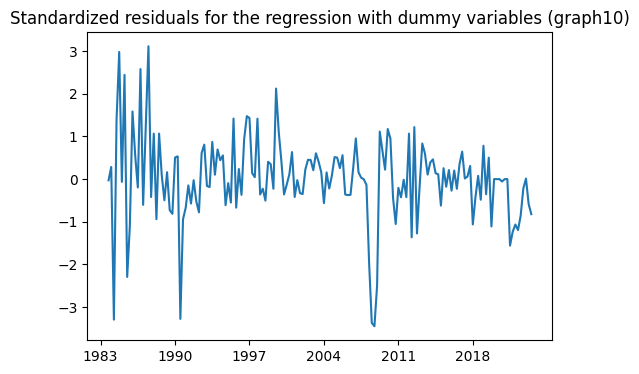

In [331]:
# plot the standardized residuals
standardized_residuals_3 = results.resid / results.resid.std()
plt.figure(figsize=(6, 4))
plt.plot(standardized_residuals_3)
plt.title("Standardized residuals for the regression with dummy variables (graph10)")
plt.xticks(range(0, len(df), 28), year[list(range(0, len(df), 28))])

 Interpret the sign of the estimated
coefficients on the dummy variables. How does the inclusion of the dummy variables
affect the estimates of the AR coefficients?

## 2. 
In this problem you analyze the properties of unit root tests by a Monte Carlo simulation.
**The KPSS test in this task must be programmed on your own.** However, for the Augmented
Dickey-Fuller test you may use the built-in Python function.

# a)
Consider the data generating process y<sub>t</sub> = c + ε<sub>t</sub>, t = 1, . . . , T, ε<sub>t</sub> iid ∼ N(0, 1).

# i. 
Explain why simulating from this process can be thought of as simulating a time
series under the H<sub>0</sub> of a KPPS test.

# ii.
Generate M = 2000 sets of time series of length T = 5000 using c = 1. </br>
For each time series, conduct a KPPS test with a constant and lag truncation l<sub>12</sub> = [12(T/100) <sup>1/4</sup>] and store the value of the test statistic. </br>
Report the 0.9, 0.95, and 0.99 quantiles of the test statistic distribution.

In [332]:
# creating the function for calculating the kpss test statistics
def kpss_statistics(y, truncation):
    """
    calculating kpss statistics
    
    parameter:
        y: time series data
        trancation: usually, 4 or 12
    
    return:
        kpss statistics
    
    """

    T = len(y)
    w = y - np.mean(y) # y-np.mean(y) has 2000 sets
    s = np.cumsum(w) 
    
    
    res_var = np.sum(w**2) / T


    # given trancation 
    truncation = truncation * (T/100)**(1/4)
    
    # long-run variance
    omega = [1 - i / (truncation + 1) for i in range(1, int(truncation)+1)]
    
    gamma = [np.sum(w[i:] * w[:-i]) / T for i in range(1, int(truncation)+1)]

    long_run_var = res_var + 2 * np.sum([o * g for o, g in zip(omega, gamma)])

    kpss = np.sum(s**2) / (T**2 * long_run_var)
    return kpss

In [333]:
# generating the time series
sets_2000 = [] 
for i in range(2000):
    epsilon = np.random.normal(0, 1, 5000)
    y = 1 + epsilon
    sets_2000.append(y)

sets_2000

[array([ 1.23277275,  0.10999782,  1.75423164, ...,  3.06350531,
         1.84495998, -0.5778551 ]),
 array([-0.38181255,  1.53367372,  2.69784152, ...,  1.41993659,
         2.46161178,  1.15447292]),
 array([-0.3224239 ,  0.46673161,  1.82782837, ...,  1.78721403,
        -0.23751399,  1.04762458]),
 array([1.74458902, 0.38853714, 1.95737978, ..., 1.22434973, 2.38292254,
        0.31831903]),
 array([ 1.85347685, -0.6055309 , -0.67486079, ...,  0.34279565,
         0.44615723,  0.70230426]),
 array([ 0.78704188, -0.36603561,  0.90063658, ...,  1.555036  ,
         0.73081912,  2.24750398]),
 array([0.5190193 , 0.54334513, 1.09414838, ..., 1.78903801, 2.30010771,
        0.71857742]),
 array([1.65701816, 1.14000752, 0.7567006 , ..., 2.19453034, 1.83391265,
        0.37446809]),
 array([-0.17056899,  1.66106474,  1.99363124, ..., -0.68658845,
         2.18567401,  2.71854357]),
 array([1.6075279 , 0.88493416, 1.24496314, ..., 2.09274559, 1.1392835 ,
        1.64176498]),
 array([-0.537

In [334]:
# running the function 2000 times
kpss_stats_values = []
for i in range(0, 2000):
    kpss_stats_values.append(kpss_statistics(sets_2000[i], 4))

kpss_stats_values

[0.13598818742630048,
 0.18932189628621138,
 0.02957883395409738,
 0.1417538220058419,
 0.16808817362159517,
 0.1392424388189098,
 0.1306041775583336,
 0.07493523566686823,
 0.18449996141206057,
 0.03726231560784939,
 0.1551642517805789,
 0.06558931719203696,
 0.4568258462810814,
 0.11464639338698587,
 0.08637345074707978,
 0.5928961757849621,
 0.2659034663108602,
 0.15506605793867242,
 0.046702124114683906,
 0.48598765673904337,
 0.1321318607412721,
 0.31260849050131145,
 0.03925537845357463,
 0.1918329823619395,
 0.06313895245220673,
 0.6336708186982195,
 0.33418741112731337,
 0.06471409818762813,
 0.181937959537622,
 0.5569949625084097,
 0.5476075877099627,
 0.5529397567939409,
 0.4932537470214679,
 0.12654902145341293,
 0.06072126350013268,
 0.08976342736103336,
 0.5909297968917283,
 0.8877069039986558,
 0.11166096252582663,
 0.1117692977266906,
 0.08545762242188136,
 0.07720458770070861,
 0.035663412388240494,
 0.13004964291445348,
 0.09285997938342751,
 0.046154409499352206,
 0.1

In [335]:
# comparing the performance of the function with the in-built function 
print(kpss_statistics(sets_2000[0], 8))

from arch import unitroot
unitroot.KPSS(sets_2000[0])

0.1379459327199927


Test Statistic,0.135
P-value,0.438
Lags,6


Text(0.5, 1.0, 'The distribution of the KPSS test statistics (graph11)')

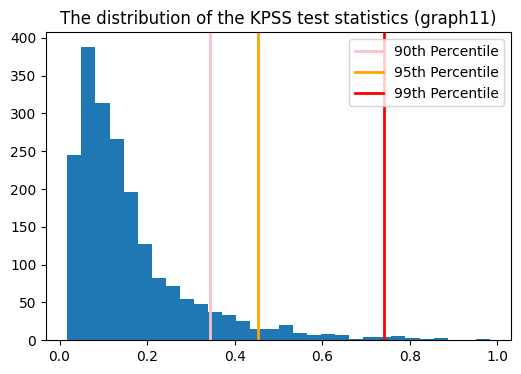

In [349]:
plt.figure(figsize=(6, 4))
plt.hist(kpss_stats_values, bins=30)

# 
# 90%と95%の位置に赤い垂直線を引く
plt.axvline(np.percentile(kpss_stats_values, 90), color='pink', linestyle='-', linewidth=2, label='90th Percentile')
plt.axvline(np.percentile(kpss_stats_values, 95), color='orange', linestyle='-', linewidth=2, label='95th Percentile')
plt.axvline(np.percentile(kpss_stats_values, 99), color='red', linestyle='-', linewidth=2, label='99th Percentile')

plt.legend()
plt.title("The distribution of the KPSS test statistics (graph11)")

In [337]:
# Report the 0.9, 0.95, and 0.99 quantiles of the test statistic distribution.
quantiles = np.quantile(kpss_stats_values, [0.9, 0.95, 0.99])

print(f"0.90 quantile: {quantiles[0]}")
print(f"0.95 quantile: {quantiles[1]}")
print(f"0.99 quantile: {quantiles[2]}")

0.90 quantile: 0.3434837384196311
0.95 quantile: 0.4529839189861362
0.99 quantile: 0.741385841405313


# iii.
Relate the reported quantiles to the asymptotic critical values of the KPPS test.

Reported quantiles were very similar to the critical value of the KPPS test.  
10%: 0.347 
5%: 0.463  
1%: 0.739

# b)
Repeat problems 2c) to 2f) for the following values of α1, α2 and T  
</br>
(α1, α2) ∈ {(0.4, 0.2), (0.5, 0.2), (0.6, 0.2), (0.7, 0.2), (0.8, 0.2)}  
T ∈ {50, 100, 200, 500}

# c)
Simulate for a given α<sub>1</sub>, α<sub>2</sub> and T, M = 2000 sets of time series from the DGP  
</br>
y<sub>t</sub> = α<sub>1</sub>y<sub>t-1</sub> + α<sub>2</sub>y<sub>t-2</sub> + ε<sub>t</sub>, (1)  
</br>
where y<sub>-1</sub> = y<sub>0</sub> = 0, and ε<sub>t</sub>
iid ∼ N(0, 1).

In [338]:
# Generate AR(2) data              
def ar2gen(alpha1, alpha2, T):            
    ar2_data = np.zeros(T)
    wn_p = np.random.normal(size=T)
    for ii in range(2,T):
        ar2_data[ii] = alpha1*ar2_data[ii-1] + alpha2*ar2_data[ii-2] + \
        wn_p[ii]

    return ar2_data

In [339]:
alphas = [(0.4, 0.2), (0.5, 0.2), (0.6, 0.2), (0.7, 0.2), (0.8, 0.2)]
T_values = [50, 100, 200, 500]


time_series_sets = []
for alpha1, alpha2 in alphas:
        for T in T_values:
            for _ in range(0, 2000):
                ar2 = ar2gen(alpha1, alpha2, T)
                time_series_sets.append(ar2)
time_series_sets[0]

array([ 0.        ,  0.        , -0.45320608,  0.82194356,  1.26297567,
        1.04535117,  2.66389353,  0.48332285,  1.22788605, -0.65779725,
       -2.04064108, -1.42406228, -0.80768393, -0.42353848,  0.07276956,
        1.10393447,  1.0205704 ,  0.01864979, -0.44150394, -1.34850438,
       -0.37559355,  0.2268991 , -0.68296425,  0.01365745,  0.112394  ,
        0.28187771,  0.39740141, -0.01854699, -0.55949837,  0.27547416,
        0.17144033,  1.08157653, -0.36848265, -0.80437689, -0.50748598,
       -2.0546836 , -1.02660331,  0.67005888, -0.97261101,  0.92289755,
       -0.41795498, -0.33146685, -0.44904366,  0.25248684,  0.21078927,
        1.91245671,  0.23778156, -0.2229736 , -0.90350016, -0.89464318])

# d)
For each of your generated M time series, conduct a KPSS test with a constant at the
5% level. Use the lag truncation parameter lq from the lecture. For both q = 4 and
q = 12, record how often the H0 is rejected in the M replications and compute the
empirical rejection frequency (number of rejections/M).

In [340]:
# q = 4
rejection_frequencies_kpss_4 = []
for time_series in [time_series_sets[i:i + 2000] for i in range(0, len(time_series_sets), 2000)]:
    rejected = 0
    for ts in time_series:
        statistics_value = kpss_statistics(ts, 4)
        if statistics_value > np.percentile(kpss_stats_values, 95):
            rejected += 1
    
    rejection_frequency = rejected / 2000
    rejection_frequencies_kpss_4.append(rejection_frequency)
rejection_frequencies_kpss_4

[0.146,
 0.159,
 0.154,
 0.1295,
 0.1995,
 0.1965,
 0.198,
 0.184,
 0.271,
 0.3025,
 0.3095,
 0.2645,
 0.3885,
 0.466,
 0.51,
 0.4895,
 0.6905,
 0.8225,
 0.9395,
 0.9895]

In [341]:
# q = 12

rejection_frequencies_kpss_12 = []
for time_series in [time_series_sets[i:i + 2000] for i in range(0, len(time_series_sets), 2000)]:
    rejected = 0
    for ts in time_series:
        statistics_value = kpss_statistics(ts, 12)
        # 12でもここの臨界値は変わらず0.463なのか
        if statistics_value > 0.463:
            rejected += 1
    
    rejection_frequency = rejected / 2000
    rejection_frequencies_kpss_12.append(rejection_frequency)

rejection_frequencies_kpss_12


[0.018,
 0.052,
 0.0655,
 0.0685,
 0.0225,
 0.061,
 0.077,
 0.08,
 0.023,
 0.101,
 0.094,
 0.0905,
 0.0555,
 0.1665,
 0.2115,
 0.1855,
 0.3415,
 0.5685,
 0.727,
 0.895]

# e)
For each of your generated M time series, conduct an Augmented Dickey Fuller test
at the 5% level with a constant (Case 2) and one lagged difference. Record how often
the unit root hypothesis is rejected in the M replications and compute the empirical
rejection frequency (number of rejections/M).

In [342]:
import statsmodels.tsa.stattools as st
rejection_frequencies_adf_1 = []
for time_series in [time_series_sets[i:i + 2000] for i in range(0, len(time_series_sets), 2000)]:
    rejected = 0
    for ts in time_series:
        adf, pval, nobs, cv = st.adfuller(ts, maxlag=1, regression='c', autolag=None, regresults=True)
        if pval < 0.05:
            rejected += 1
    
    rejection_frequency = rejected / 2000
    rejection_frequencies_adf_1.append(rejection_frequency)    

# f)
For each of your generatedM time series, conduct an Augmented Dickey Fuller test at
the 5% level using the test regression Δyt = c+ϕyt−1+
Pp−1
i=1 α∗
iΔyt−i+εt, where the
number of lagged differences p − 1 is determined using the information criterion BIC.
Allow between 0 and 4 lagged differences. Record how often the unit root hypothesis is
rejected in the M replications and compute the empirical rejection frequency (number
of rejections/M).

In [343]:
rejection_frequencies_adf_2 = []
for time_series in [time_series_sets[i:i + 2000] for i in range(0, len(time_series_sets), 2000)]:
    rejected = 0
    for ts in time_series:
        adf, pval, nobs, cv = st.adfuller(ts, maxlag=4, regression='c', autolag="BIC", regresults=True)
        if pval < 0.05:
            rejected += 1
    
    rejection_frequency = rejected / 2000
    rejection_frequencies_adf_2.append(rejection_frequency)    
rejection_frequencies_adf_2

[0.8275,
 0.9885,
 1.0,
 1.0,
 0.722,
 0.936,
 1.0,
 1.0,
 0.514,
 0.766,
 0.994,
 1.0,
 0.269,
 0.4325,
 0.6975,
 1.0,
 0.095,
 0.1015,
 0.0825,
 0.049]

# g)
Report for each T and different values of α1 the rejection frequencies of the two KPSS
test variants and of the two ADF test variants in a table. For the KPPS and the ADF
tests, explain which of the rejection frequencies correspond to the empirical size and
power of the test. What size values would you expect in an ideal test? How does the
empirical size values compare against this?

In [344]:
# to create the dataframe, getting the alpha values and T values
alpha_t = []
for alpha1, alpha2 in alphas:
    for T in T_values:
        alpha_t.append((alpha1, alpha2, T, ar2))
        
# alpha1
alpha1 = [i[0] for i in alpha_t]

# alpha2
alpha2 = [i[1] for i in alpha_t]

# T
t = [i[2] for i in alpha_t]

# making a dataframe
df = pd.DataFrame({
    "alpha1": alpha1,
    "alpha2": alpha2,
    "T" : t,
    "KPSS 1": rejection_frequencies_kpss_4,
    "KPSS 2": rejection_frequencies_kpss_12,
    "ADF 1": rejection_frequencies_adf_1,
    "ADF 2": rejection_frequencies_adf_2
})
df

,alpha1,alpha2,T,KPSS 1,KPSS 2,ADF 1,ADF 2
0,0.4,0.2,50,0.1460,0.0180,0.5775,0.8275
1,0.4,0.2,100,0.1590,0.0520,0.9900,0.9885
2,0.4,0.2,200,0.1540,0.0655,1.0000,1.0000
3,0.4,0.2,500,0.1295,0.0685,1.0000,1.0000
4,0.5,0.2,50,0.1995,0.0225,0.4095,0.7220
5,0.5,0.2,100,0.1965,0.0610,0.9205,0.9360
6,0.5,0.2,200,0.1980,0.0770,1.0000,1.0000
7,0.5,0.2,500,0.1840,0.0800,1.0000,1.0000
8,0.6,0.2,50,0.2710,0.0230,0.2255,0.5140
9,0.6,0.2,100,0.3025,0.1010,0.6310,0.7660


# h)
For each T provide a plot showing different values of α1 on the x-axis and the rejection
frequencies of each of the 4 tests on the y-axis. Interpret your results: Which of the
KPSS test variants is doing better? Which variant of the ADF test is doing better?
Briefly describe any differences between the ADF test and the KPSS test in terms of
correct unit root detection.

Text(0.5, 1.0, 'T=500')

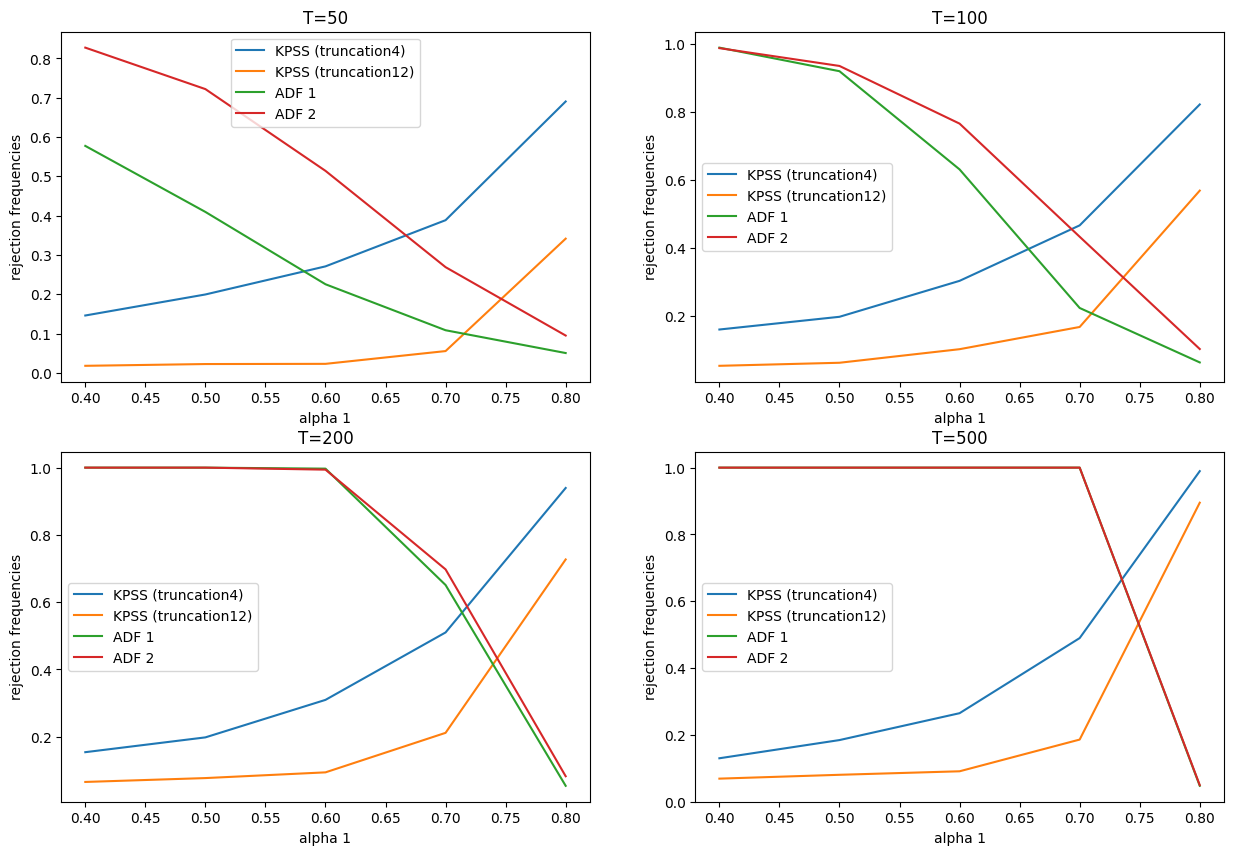

In [345]:
# plot the graphs

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
# KPSS (trancation 4)
plt.plot(df["alpha1"][::4], df["KPSS 1"][::4], label="KPSS (truncation4)")

# KPSS (trancation 12)
plt.plot(df["alpha1"][::4], df["KPSS 2"][::4], label="KPSS (truncation12)")

# ADF 1
plt.plot(df["alpha1"][::4], df["ADF 1"][::4], label="ADF 1")

# ADF 2
plt.plot(df["alpha1"][::4], df["ADF 2"][::4], label="ADF 2")

plt.legend()

#plt.xticks(df["alpha1"][::4])
plt.xlabel("alpha 1")
plt.ylabel("rejection frequencies")
plt.title("T=50")

plt.subplot(2, 2, 2)
# T = 100
# KPSS (trancation 4)
plt.plot(df["alpha1"][1::4], df["KPSS 1"][1::4], label="KPSS (truncation4)")

# KPSS (trancation 12)
plt.plot(df["alpha1"][1::4], df["KPSS 2"][1::4], label="KPSS (truncation12)")

# ADF 1
plt.plot(df["alpha1"][1::4], df["ADF 1"][1::4], label="ADF 1")

# ADF 2
plt.plot(df["alpha1"][1::4], df["ADF 2"][1::4], label="ADF 2")

plt.legend()

#plt.xticks(df["alpha1"][::4])
plt.xlabel("alpha 1")
plt.ylabel("rejection frequencies")
plt.title("T=100")



plt.subplot(2, 2, 3)
# T = 200

# KPSS (trancation 4)
plt.plot(df["alpha1"][2::4], df["KPSS 1"][2::4], label="KPSS (truncation4)")

# KPSS (trancation 12)
plt.plot(df["alpha1"][2::4], df["KPSS 2"][2::4], label="KPSS (truncation12)")

# ADF 1
plt.plot(df["alpha1"][2::4], df["ADF 1"][2::4], label="ADF 1")

# ADF 2
plt.plot(df["alpha1"][2::4], df["ADF 2"][2::4], label="ADF 2")

plt.legend()

#plt.xticks(df["alpha1"][::4])
plt.xlabel("alpha 1")
plt.ylabel("rejection frequencies")
plt.title("T=200")



plt.subplot(2, 2, 4)
# T = 500

# KPSS (trancation 4)
plt.plot(df["alpha1"][3::4], df["KPSS 1"][3::4], label="KPSS (truncation4)")

# KPSS (trancation 12)
plt.plot(df["alpha1"][3::4], df["KPSS 2"][3::4], label="KPSS (truncation12)")

# ADF 1
plt.plot(df["alpha1"][3::4], df["ADF 1"][3::4], label="ADF 1")

# ADF 2
plt.plot(df["alpha1"][3::4], df["ADF 2"][3::4], label="ADF 2")

plt.legend()

#plt.xticks(df["alpha1"][::4])
plt.xlabel("alpha 1")
plt.ylabel("rejection frequencies")
plt.title("T=500")
